In [ ]:
!pip install tqdm
!pip install openpyxl
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
projectpath = '/content/drive/MyDrive/Uni logos/'
savepath = '/content/drive/MyDrive/Uni logos/imgs/'

In [ ]:
import time
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import cv2
from PIL import Image, ImageDraw


In [ ]:
url = 'https://www.shanghairanking.com/rankings/arwu/2021'
response = requests.get(url)

In [ ]:
soup = BeautifulSoup(response.text, 'lxml')

In [ ]:
soup

<!DOCTYPE html>
<html lang="en">
<head><script>!function(t){function c(){c.q.push(arguments)}t.TeaAnalyticsObject="collectEvent",t.collectEvent||(c.q=c.q||[],t.collectEvent=c),t.collectEvent.l=+new Date}(window)</script>
<script async="" src="https://sf1-scmcdn-tos.pstatp.com/goofy/log-sdk/collect/collect-autotrack-rangers.js"></script>
<script>window.collectEvent("init",{app_id:237653,channel:"cn",log:!0,autotrack:!1}),window.collectEvent("start")</script>
<title>ShanghaiRanking's Academic Ranking of World Universities</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width,initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="IE=edge" data-n-head="ssr" http-equiv="X-UA-Compatible"/><link data-n-head="ssr" href="/favicon.ico" rel="icon" type="image/x-icon"/><link as="script" href="/_nuxt/040b440.js" rel="preload"/><link as="script" href="/_nuxt/0c576a9.js" rel="preload"/><link as="script" href="/_nuxt/fad100f.js" rel="preload"/><link as="script" 

In [ ]:
img_page = soup.select('.univ-logo')

In [ ]:
img_page

[<img alt="Harvard University" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/032bd1b77.png"/>,
 <img alt="Stanford University" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/13de8913b.png"/>,
 <img alt="University of Cambridge" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/8d9861b69.png"/>,
 <img alt="Massachusetts Institute of Technology (MIT)" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/79165fd8b.png"/>,
 <img alt="University of California, Berkeley" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/0ff179fb8.png"/>,
 <img alt="Princeton University" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/b1dad5288.png"/>,
 <img alt="University of Oxford" class="univ-logo" data-v-ae1ab

In [ ]:
page[i]['src']

Object `[i][src]` not found


In [ ]:
rank = []
for i in range(30):
  uniname = img_page[i]['alt']
  rank.append(uniname)
  imagelink = requests.get('https://www.shanghairanking.com'+img_page[i]['src'])
  f = open(f'{savepath}{uniname}.png','wb')
  f.write(imagelink.content)
  f.close()

In [ ]:
rank_df = pd.DataFrame({'Rank': range(1, 1+len(rank)), 'University': rank})
rank_df.to_excel(projectpath+'uni ranking.xlsx', index=False)
rank_df

Rank                                   University
0      1                           Harvard University
1      2                          Stanford University
2      3                      University of Cambridge
3      4  Massachusetts Institute of Technology (MIT)
4      5           University of California, Berkeley
5      6                         Princeton University
6      7                         University of Oxford
7      8                          Columbia University
8      9           California Institute of Technology
9     10                        University of Chicago
10    11                              Yale University
11    12                           Cornell University
12    13                      Paris-Saclay University
13    14        University of California, Los Angeles
14    15                   University of Pennsylvania
15    16                     Johns Hopkins University
16    17                    University College London
17    18          University of California, San Diego
18    19                     University of Washington
19    20      University of California, San Francisco
20    21                                   ETH Zurich
21    22                        University of Toronto
22    23           Washington University in St. Louis
23    24                      The University of Tokyo
24    25                      Imperial College London
25    26           University of Michigan - Ann Arbor
26    27                          New York University
27    28                          Tsinghua University
28    29  University of North Carolina at Chapel Hill
29    30                     University of Copenhagen

In [ ]:
im=cv2.imread('/content/drive/MyDrive/Uni logos/imgs/California Institute of Technology.png')

<function matplotlib.pyplot.show(close=None, block=None)>

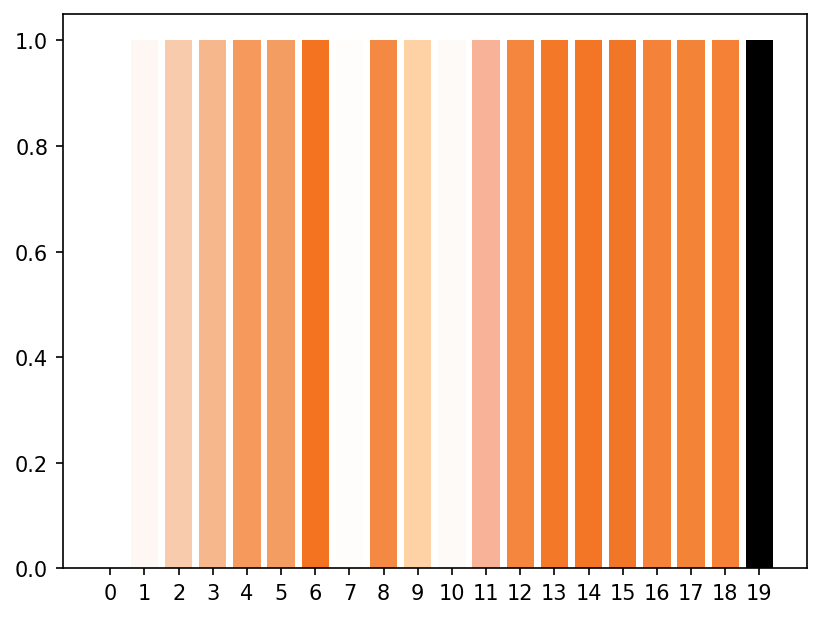

In [ ]:
im=Image.open('/content/drive/MyDrive/Uni logos/imgs/California Institute of Technology.png')

# 要提取的主要颜色数量
num_colors = 20
small_image = im.resize((80, 80))
result = small_image.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
result = result.convert('RGB')
main_colors = result.getcolors()

col_extract = []
# 显示提取的主要颜色
for count, col in main_colors:
    #print([col[i]/255 for i in range(3)])#RGB转RGBA，可输出RGBA色号
    col_extract.append([col[i]/255 for i in range(3)])

#使用提取的颜色绘制条形图
plt.figure(dpi=150)
plt.bar(range(len(col_extract)),np.ones(len(col_extract)),color=(col_extract))
plt.xticks(range(len(col_extract)), (range(len(col_extract))))
plt.show


# Processing

In [ ]:
!pip install colorthief
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from colorthief import ColorThief

color_thief = ColorThief(image_path)

main_colors = color_thief.get_palette(color_count=2)
main_colors[0]

NameError: ignored

In [ ]:
np.array(main_colors[0])/255

In [ ]:

plt.imshow([[np.array(main_colors[0])/255]])

<ipython-input-18-c1451320cbcc>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.imshow([[np.array(main_colors[0])/255]])


TypeError: ignored

In [ ]:
sub_size

(50, 50)

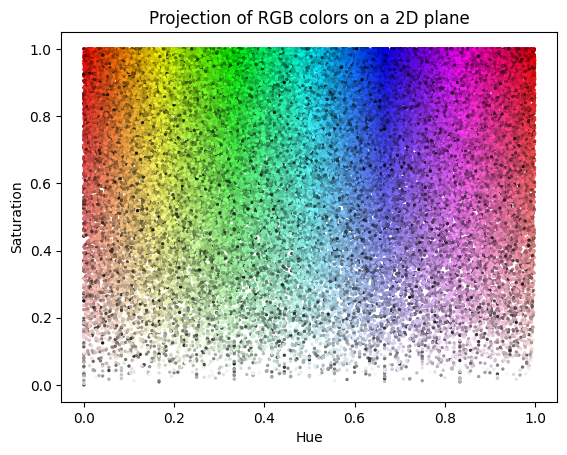

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

# 创建一个256x256x3的随机RGB图像
rgb_image = np.random.randint(0, 256, (256, 256, 3))

# 将RGB图像转换为HSV图像
hsv_image = colors.rgb_to_hsv(rgb_image/255.0)

# 使用色相和饱和度作为二维坐标
h = hsv_image[:,:,0].flatten()
s = hsv_image[:,:,1].flatten()

# 创建一个散点图
plt.scatter(h, s, c=rgb_image.reshape(-1,3)/255.0, s=2)
plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('Projection of RGB colors on a 2D plane')
plt.show()

In [ ]:
rgb_image

array([[[102, 221, 158],
        [228, 203, 145],
        [170, 188, 194],
        ...,
        [109,  53, 215],
        [ 72, 203, 248],
        [126, 145, 128]],

       [[104, 154,  74],
        [ 17, 160,   0],
        [149,  91, 165],
        ...,
        [ 28,  87, 119],
        [242,  97, 250],
        [ 29,  88, 102]],

       [[  0,  11, 224],
        [ 46, 231, 161],
        [222, 220,   3],
        ...,
        [222, 191,  41],
        [238,  77,  11],
        [  3, 183, 143]],

       ...,

       [[231, 118, 198],
        [ 17, 184, 242],
        [104,  70, 124],
        ...,
        [ 16, 193, 165],
        [192,  95, 109],
        [133,   1,   5]],

       [[139, 179,  23],
        [ 41,  41, 102],
        [161, 177, 163],
        ...,
        [236, 215, 135],
        [  2, 231,  80],
        [ 96, 230, 244]],

       [[125,   7, 115],
        [136, 164, 213],
        [162, 245, 121],
        ...,
        [145,  15, 137],
        [ 89, 112, 199],
        [100, 108, 169]]

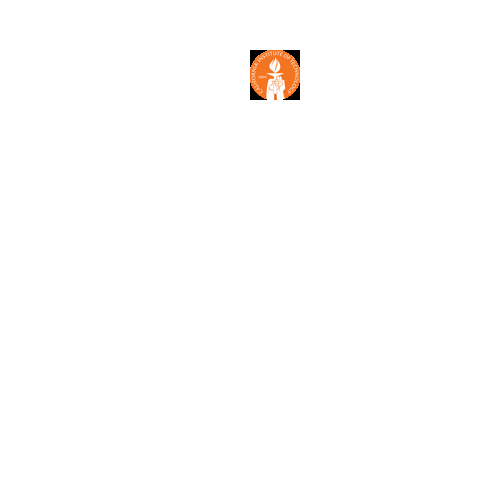

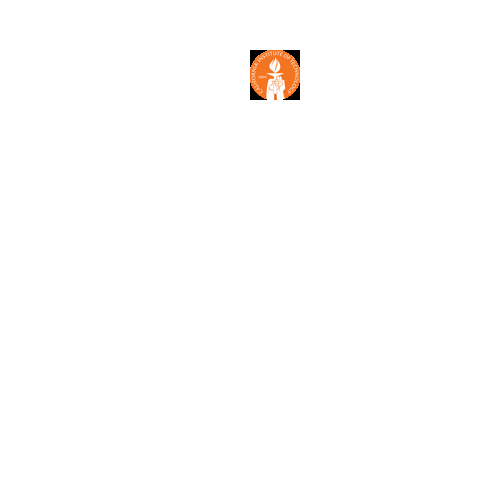

In [ ]:
from PIL import Image, ImageDraw

def paste_image_on_grid(image_size, grid_size, paste_image_path, row, col, img=None):
    # 计算每个子图的大小
    sub_size = (image_size[0]//grid_size, image_size[1]//grid_size)

    # 创建一张空白图片
    if img is None:
      img = Image.new('RGB', image_size, (255, 255, 255))

    # 打开你希望粘贴的图片并将其缩放到子图大小
    paste_img = Image.open(paste_image_path)
    paste_img = paste_img.resize(sub_size)

    # 在指定位置粘贴图片
    img.paste(paste_img, (col*sub_size[0], row*sub_size[1]))

    # 显示图片
    img.show()

    return img

# 调用函数
image_size = (500, 500)
grid_size = 10
paste_image_path = '/content/drive/MyDrive/Uni logos/imgs/California Institute of Technology.png' # 请将这里替换为你的图片路径
row = 1
col = 5
paste_image_on_grid(image_size, grid_size, paste_image_path, row, col)


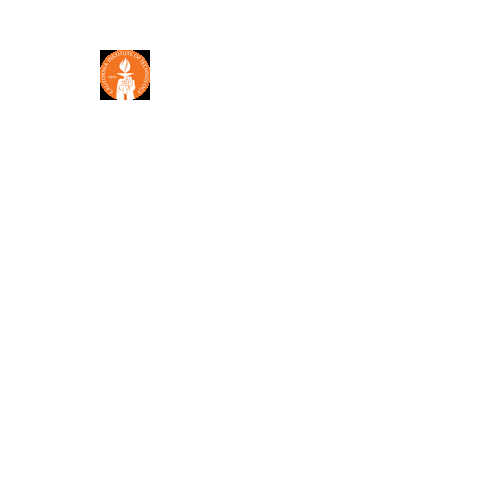

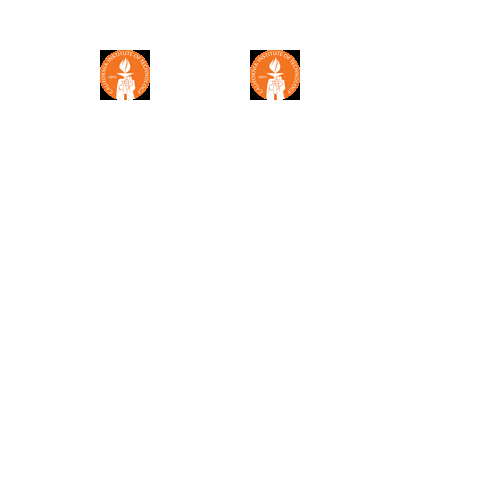

In [ ]:
image_size = (500, 500)
grid_size = 10
paste_image_path = '/content/drive/MyDrive/Uni logos/imgs/California Institute of Technology.png' # 请将这里替换为你的图片路径
row = 1
col = 2
img = paste_image_on_grid(image_size, grid_size, paste_image_path, row, col)
col = 5
img = paste_image_on_grid(image_size, grid_size, paste_image_path, row, col, img)

In [ ]:
img

In [ ]:
from PIL import Image, ImageDraw

# 定义图片大小和每个子图大小
image_size = (500, 500)
sub_size = (image_size[0]//10, image_size[1]//10)

# 创建一张空白图片
img = Image.new('RGB', image_size, (255, 255, 255))

# 打开你希望粘贴的图片并将其缩放到子图大小
paste_image_path = '/content/drive/MyDrive/Uni logos/imgs/California Institute of Technology.png' # 请将这里替换为你的图片路径
paste_img = Image.open(paste_image_path)
paste_img = paste_img.resize(sub_size)

# 在（1，1）位置粘贴图片
img.paste(paste_img, (sub_size[0], sub_size[1]))

# 保存图片
img.save('output.png')

# 显示图片
img.show()


IndexError: ignored

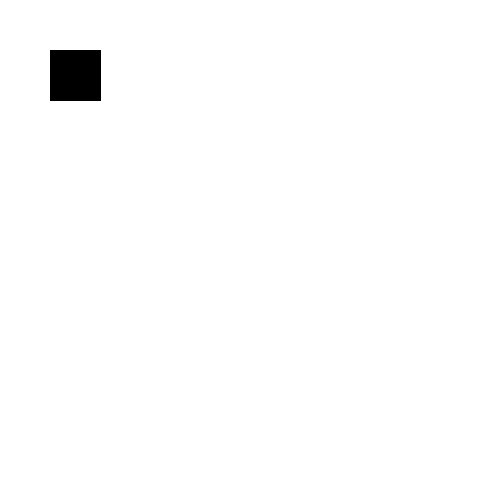

In [ ]:
from PIL import Image, ImageDraw

# 定义图片大小和每个子图大小
image_size = (500, 500)
sub_size = (image_size[0]//10, image_size[1]//10)

# 创建一张空白图片
img = Image.new('RGB', image_size, (255, 255, 255))
draw = ImageDraw.Draw(img)

# 绘制（1，1）位置的纯色块
draw.rectangle([(sub_size[0], sub_size[1]), (2*sub_size[0], 2*sub_size[1])], fill=(0,0,0))

# 保存图片
img.save('output.png')

# 显示图片
img.show()


In [ ]:
from PIL import Image, ImageDraw

# 打开图片
image_path = '/temp.png' # 请将这里替换为你的图片路径
img = Image.open(image_path)

# 获取图片的宽度和高度
width, height = img.size

# 计算子图的大小
sub_width = width // 10
sub_height = height // 10

# 创建一个新的空白画布
new_img = Image.new('RGB', (width, height))

# 创建一个画笔对象
draw = ImageDraw.Draw(new_img)

# 将原图分割为10*10个子图
for i in range(10):
    for j in range(10):
        # 提取子图
        sub_img = img.crop((j*sub_width, i*sub_height, (j+1)*sub_width, (i+1)*sub_height))
        if i == 1 and j == 1:
            # 在（1,1）的位置绘制RGB为[20,10,30]的纯色块
            draw.rectangle([(j*sub_width, i*sub_height), ((j+1)*sub_width, (i+1)*sub_height)], fill=(20,10,30))
        else:
            # 将子图粘贴到新的画布上
            new_img.paste(sub_img, (j*sub_width, i*sub_height))

# 显示新的图片
new_img.show()


FileNotFoundError: ignored

# Drawing

In [ ]:
rank_df = pd.read_excel(projectpath+'uni ranking.xlsx')
rank_df

Rank                                   University
0      1                           Harvard University
1      2                          Stanford University
2      3                      University of Cambridge
3      4  Massachusetts Institute of Technology (MIT)
4      5           University of California, Berkeley
5      6                         Princeton University
6      7                         University of Oxford
7      8                          Columbia University
8      9           California Institute of Technology
9     10                        University of Chicago
10    11                              Yale University
11    12                           Cornell University
12    13                      Paris-Saclay University
13    14        University of California, Los Angeles
14    15                   University of Pennsylvania
15    16                     Johns Hopkins University
16    17                    University College London
17    18          University of California, San Diego
18    19                     University of Washington
19    20      University of California, San Francisco
20    21                                   ETH Zurich
21    22                        University of Toronto
22    23           Washington University in St. Louis
23    24                      The University of Tokyo
24    25                      Imperial College London
25    26           University of Michigan - Ann Arbor
26    27                          New York University
27    28                          Tsinghua University
28    29  University of North Carolina at Chapel Hill
29    30                     University of Copenhagen

In [ ]:
from colorthief import ColorThief

# def get_main_colors(image_path, num_colors):
#     color_thief = ColorThief(image_path)
#     # 获取前num_colors个主要颜色
#     main_colors = color_thief.get_palette(color_count=num_colors)
#     return main_colors


def get_main_colors(image_path, num_colors=1):
    color_thief = ColorThief(image_path)
    if num_colors == 1:
        # 如果只需要一种颜色，使用get_color
        main_color = color_thief.get_color(quality=1)
        return [main_color]
    else:
        # 获取前num_colors个主要颜色
        main_colors = color_thief.get_palette(color_count=num_colors)
        return main_colors


# 测试函数
image_path = savepath+i+'.png' # 请将这里替换为你的图片路径
num_colors = 1  # 你希望提取的主要颜色数量
print(get_main_colors(image_path, num_colors)[0])

(145, 26, 27)


In [ ]:
main_color_list = []
for i in rank_df['University']:
  temp_path = savepath+i+'.png'
  main_color_list.append(get_main_colors(image_path=temp_path, num_colors=1)[0])
rank_df['main_color'] = main_color_list
rank_df

Rank                                   University       main_color
0      1                           Harvard University     (27, 33, 38)
1      2                          Stanford University    (145, 31, 31)
2      3                      University of Cambridge     (28, 20, 11)
3      4  Massachusetts Institute of Technology (MIT)  (232, 200, 206)
4      5           University of California, Berkeley   (196, 135, 21)
5      6                         Princeton University   (232, 116, 39)
6      7                         University of Oxford  (215, 178, 113)
7      8                          Columbia University    (16, 89, 168)
8      9           California Institute of Technology   (243, 116, 36)
9     10                        University of Chicago  (226, 197, 197)
10    11                              Yale University   (224, 186, 81)
11    12                           Cornell University    (198, 84, 84)
12    13                      Paris-Saclay University     (100, 4, 60)
13    14        University of California, Los Angeles   (49, 123, 177)
14    15                   University of Pennsylvania    (22, 43, 100)
15    16                     Johns Hopkins University  (130, 142, 148)
16    17                    University College London     (36, 28, 36)
17    18          University of California, San Diego     (31, 46, 74)
18    19                     University of Washington    (91, 63, 142)
19    20      University of California, San Francisco   (40, 169, 177)
20    21                                   ETH Zurich       (4, 4, 12)
21    22                        University of Toronto  (205, 214, 225)
22    23           Washington University in St. Louis  (222, 195, 178)
23    24                      The University of Tokyo    (251, 187, 4)
24    25                      Imperial College London     (18, 42, 77)
25    26           University of Michigan - Ann Arbor    (243, 197, 6)
26    27                          New York University     (84, 4, 140)
27    28                          Tsinghua University   (132, 52, 140)
28    29  University of North Carolina at Chapel Hill   (83, 160, 213)
29    30                     University of Copenhagen    (145, 26, 27)

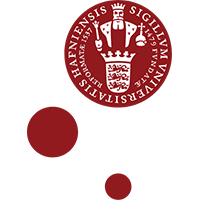

In [ ]:
im=Image.open(savepath+i+'.png')
im.show()

In [ ]:
import colorsys
def rgb_to_hsv(rgb_set):
    # Unpack RGB values and normalize to the range [0, 1]
    r, g, b = [x / 255.0 for x in rgb_set]

    # Convert to HSV
    h, s, v = colorsys.rgb_to_hsv(r, g, b)

    return [h,s]


rank_df['HSV'] = rank_df['main_color'].apply(rgb_to_hsv)
rank_df

Rank                                   University       main_color  \
0      1                           Harvard University     (27, 33, 38)   
1      2                          Stanford University    (145, 31, 31)   
2      3                      University of Cambridge     (28, 20, 11)   
3      4  Massachusetts Institute of Technology (MIT)  (232, 200, 206)   
4      5           University of California, Berkeley   (196, 135, 21)   
5      6                         Princeton University   (232, 116, 39)   
6      7                         University of Oxford  (215, 178, 113)   
7      8                          Columbia University    (16, 89, 168)   
8      9           California Institute of Technology   (243, 116, 36)   
9     10                        University of Chicago  (226, 197, 197)   
10    11                              Yale University   (224, 186, 81)   
11    12                           Cornell University    (198, 84, 84)   
12    13                      Paris-Saclay University     (100, 4, 60)   
13    14        University of California, Los Angeles   (49, 123, 177)   
14    15                   University of Pennsylvania    (22, 43, 100)   
15    16                     Johns Hopkins University  (130, 142, 148)   
16    17                    University College London     (36, 28, 36)   
17    18          University of California, San Diego     (31, 46, 74)   
18    19                     University of Washington    (91, 63, 142)   
19    20      University of California, San Francisco   (40, 169, 177)   
20    21                                   ETH Zurich       (4, 4, 12)   
21    22                        University of Toronto  (205, 214, 225)   
22    23           Washington University in St. Louis  (222, 195, 178)   
23    24                      The University of Tokyo    (251, 187, 4)   
24    25                      Imperial College London     (18, 42, 77)   
25    26           University of Michigan - Ann Arbor    (243, 197, 6)   
26    27                          New York University     (84, 4, 140)   
27    28                          Tsinghua University   (132, 52, 140)   
28    29  University of North Carolina at Chapel Hill   (83, 160, 213)   
29    30                     University of Copenhagen    (145, 26, 27)   

                                           HSV  
0     [0.5757575757575757, 0.2894736842105263]  
1                    [0.0, 0.7862068965517242]  
2    [0.08823529411764706, 0.6071428571428571]  
3               [0.96875, 0.13793103448275862]  
4    [0.10857142857142855, 0.8928571428571428]  
5    [0.06649395509499136, 0.8318965517241379]  
6    [0.10620915032679738, 0.4744186046511628]  
7     [0.5866228070175438, 0.9047619047619048]  
8    [0.06441223832528181, 0.8518518518518519]  
9                   [0.0, 0.12831858407079638]  
10   [0.12237762237762236, 0.6383928571428572]  
11                   [0.0, 0.5757575757575758]  
12                  [0.9027777777777778, 0.96]  
13             [0.5703125, 0.7231638418079096]  
14                  [0.6217948717948718, 0.78]  
15   [0.5555555555555555, 0.12162162162162175]  
16    [0.8333333333333334, 0.2222222222222222]  
17     [0.6085271317829458, 0.581081081081081]  
18    [0.7257383966244726, 0.5563380281690141]  
19    [0.5097323600973236, 0.7740112994350282]  
20    [0.6666666666666666, 0.6666666666666666]  
21   [0.5916666666666667, 0.08888888888888882]  
22  [0.06439393939393935, 0.19819819819819826]  
23   [0.12348178137651822, 0.9840637450199202]  
24    [0.5988700564971752, 0.7662337662337663]  
25   [0.13431786216596345, 0.9753086419753086]  
26    [0.7647058823529411, 0.9714285714285715]  
27    [0.8181818181818182, 0.6285714285714286]  
28     [0.567948717948718, 0.6103286384976525]  
29    [0.9985994397759104, 0.8206896551724139]

In [ ]:
def x(hs,size=9):
  x = round(hs[0]*size)
  return x

def y(hs,size=9):
  y = round(hs[1]*size)
  return y

rank_df['X'] = rank_df['HSV'].apply(x)
rank_df['Y'] = rank_df['HSV'].apply(y)
rank_df

Rank                                   University       main_color  \
9     10                        University of Chicago  (226, 197, 197)   
11    12                           Cornell University    (198, 84, 84)   
1      2                          Stanford University    (145, 31, 31)   
22    23           Washington University in St. Louis  (222, 195, 178)   
8      9           California Institute of Technology   (243, 116, 36)   
5      6                         Princeton University   (232, 116, 39)   
2      3                      University of Cambridge     (28, 20, 11)   
6      7                         University of Oxford  (215, 178, 113)   
4      5           University of California, Berkeley   (196, 135, 21)   
10    11                              Yale University   (224, 186, 81)   
23    24                      The University of Tokyo    (251, 187, 4)   
25    26           University of Michigan - Ann Arbor    (243, 197, 6)   
19    20      University of California, San Francisco   (40, 169, 177)   
15    16                     Johns Hopkins University  (130, 142, 148)   
28    29  University of North Carolina at Chapel Hill   (83, 160, 213)   
13    14        University of California, Los Angeles   (49, 123, 177)   
0      1                           Harvard University     (27, 33, 38)   
7      8                          Columbia University    (16, 89, 168)   
21    22                        University of Toronto  (205, 214, 225)   
24    25                      Imperial College London     (18, 42, 77)   
17    18          University of California, San Diego     (31, 46, 74)   
14    15                   University of Pennsylvania    (22, 43, 100)   
20    21                                   ETH Zurich       (4, 4, 12)   
18    19                     University of Washington    (91, 63, 142)   
26    27                          New York University     (84, 4, 140)   
27    28                          Tsinghua University   (132, 52, 140)   
16    17                    University College London     (36, 28, 36)   
12    13                      Paris-Saclay University     (100, 4, 60)   
3      4  Massachusetts Institute of Technology (MIT)  (232, 200, 206)   
29    30                     University of Copenhagen    (145, 26, 27)   

                                           HSV        XY  X  Y  
9                   [0.0, 0.12831858407079638]   [0, 13]  0  1  
11                   [0.0, 0.5757575757575758]   [0, 57]  0  5  
1                    [0.0, 0.7862068965517242]   [0, 78]  0  7  
22  [0.06439393939393935, 0.19819819819819826]   [6, 20]  1  2  
8    [0.06441223832528181, 0.8518518518518519]   [6, 84]  1  8  
5    [0.06649395509499136, 0.8318965517241379]   [7, 82]  1  7  
2    [0.08823529411764706, 0.6071428571428571]   [9, 60]  1  5  
6    [0.10620915032679738, 0.4744186046511628]  [11, 47]  1  4  
4    [0.10857142857142855, 0.8928571428571428]  [11, 88]  1  8  
10   [0.12237762237762236, 0.6383928571428572]  [12, 63]  1  6  
23   [0.12348178137651822, 0.9840637450199202]  [12, 97]  1  9  
25   [0.13431786216596345, 0.9753086419753086]  [13, 97]  1  9  
19    [0.5097323600973236, 0.7740112994350282]  [50, 77]  5  7  
15   [0.5555555555555555, 0.12162162162162175]  [55, 12]  5  1  
28     [0.567948717948718, 0.6103286384976525]  [56, 60]  5  5  
13             [0.5703125, 0.7231638418079096]  [56, 72]  5  7  
0     [0.5757575757575757, 0.2894736842105263]  [57, 29]  5  3  
7     [0.5866228070175438, 0.9047619047619048]  [58, 90]  5  8  
21   [0.5916666666666667, 0.08888888888888882]   [59, 9]  5  1  
24    [0.5988700564971752, 0.7662337662337663]  [59, 76]  5  7  
17     [0.6085271317829458, 0.581081081081081]  [60, 58]  5  5  
14                  [0.6217948717948718, 0.78]  [62, 77]  6  7  
20    [0.6666666666666666, 0.6666666666666666]  [66, 66]  6  6  
18    [0.7257383966244726, 0.5563380281690141]  [72, 55]  7  5  
26    [0.7647058823529411, 0.9714285714285715]  [76, 96]  7  9  
27    [0.8181818181

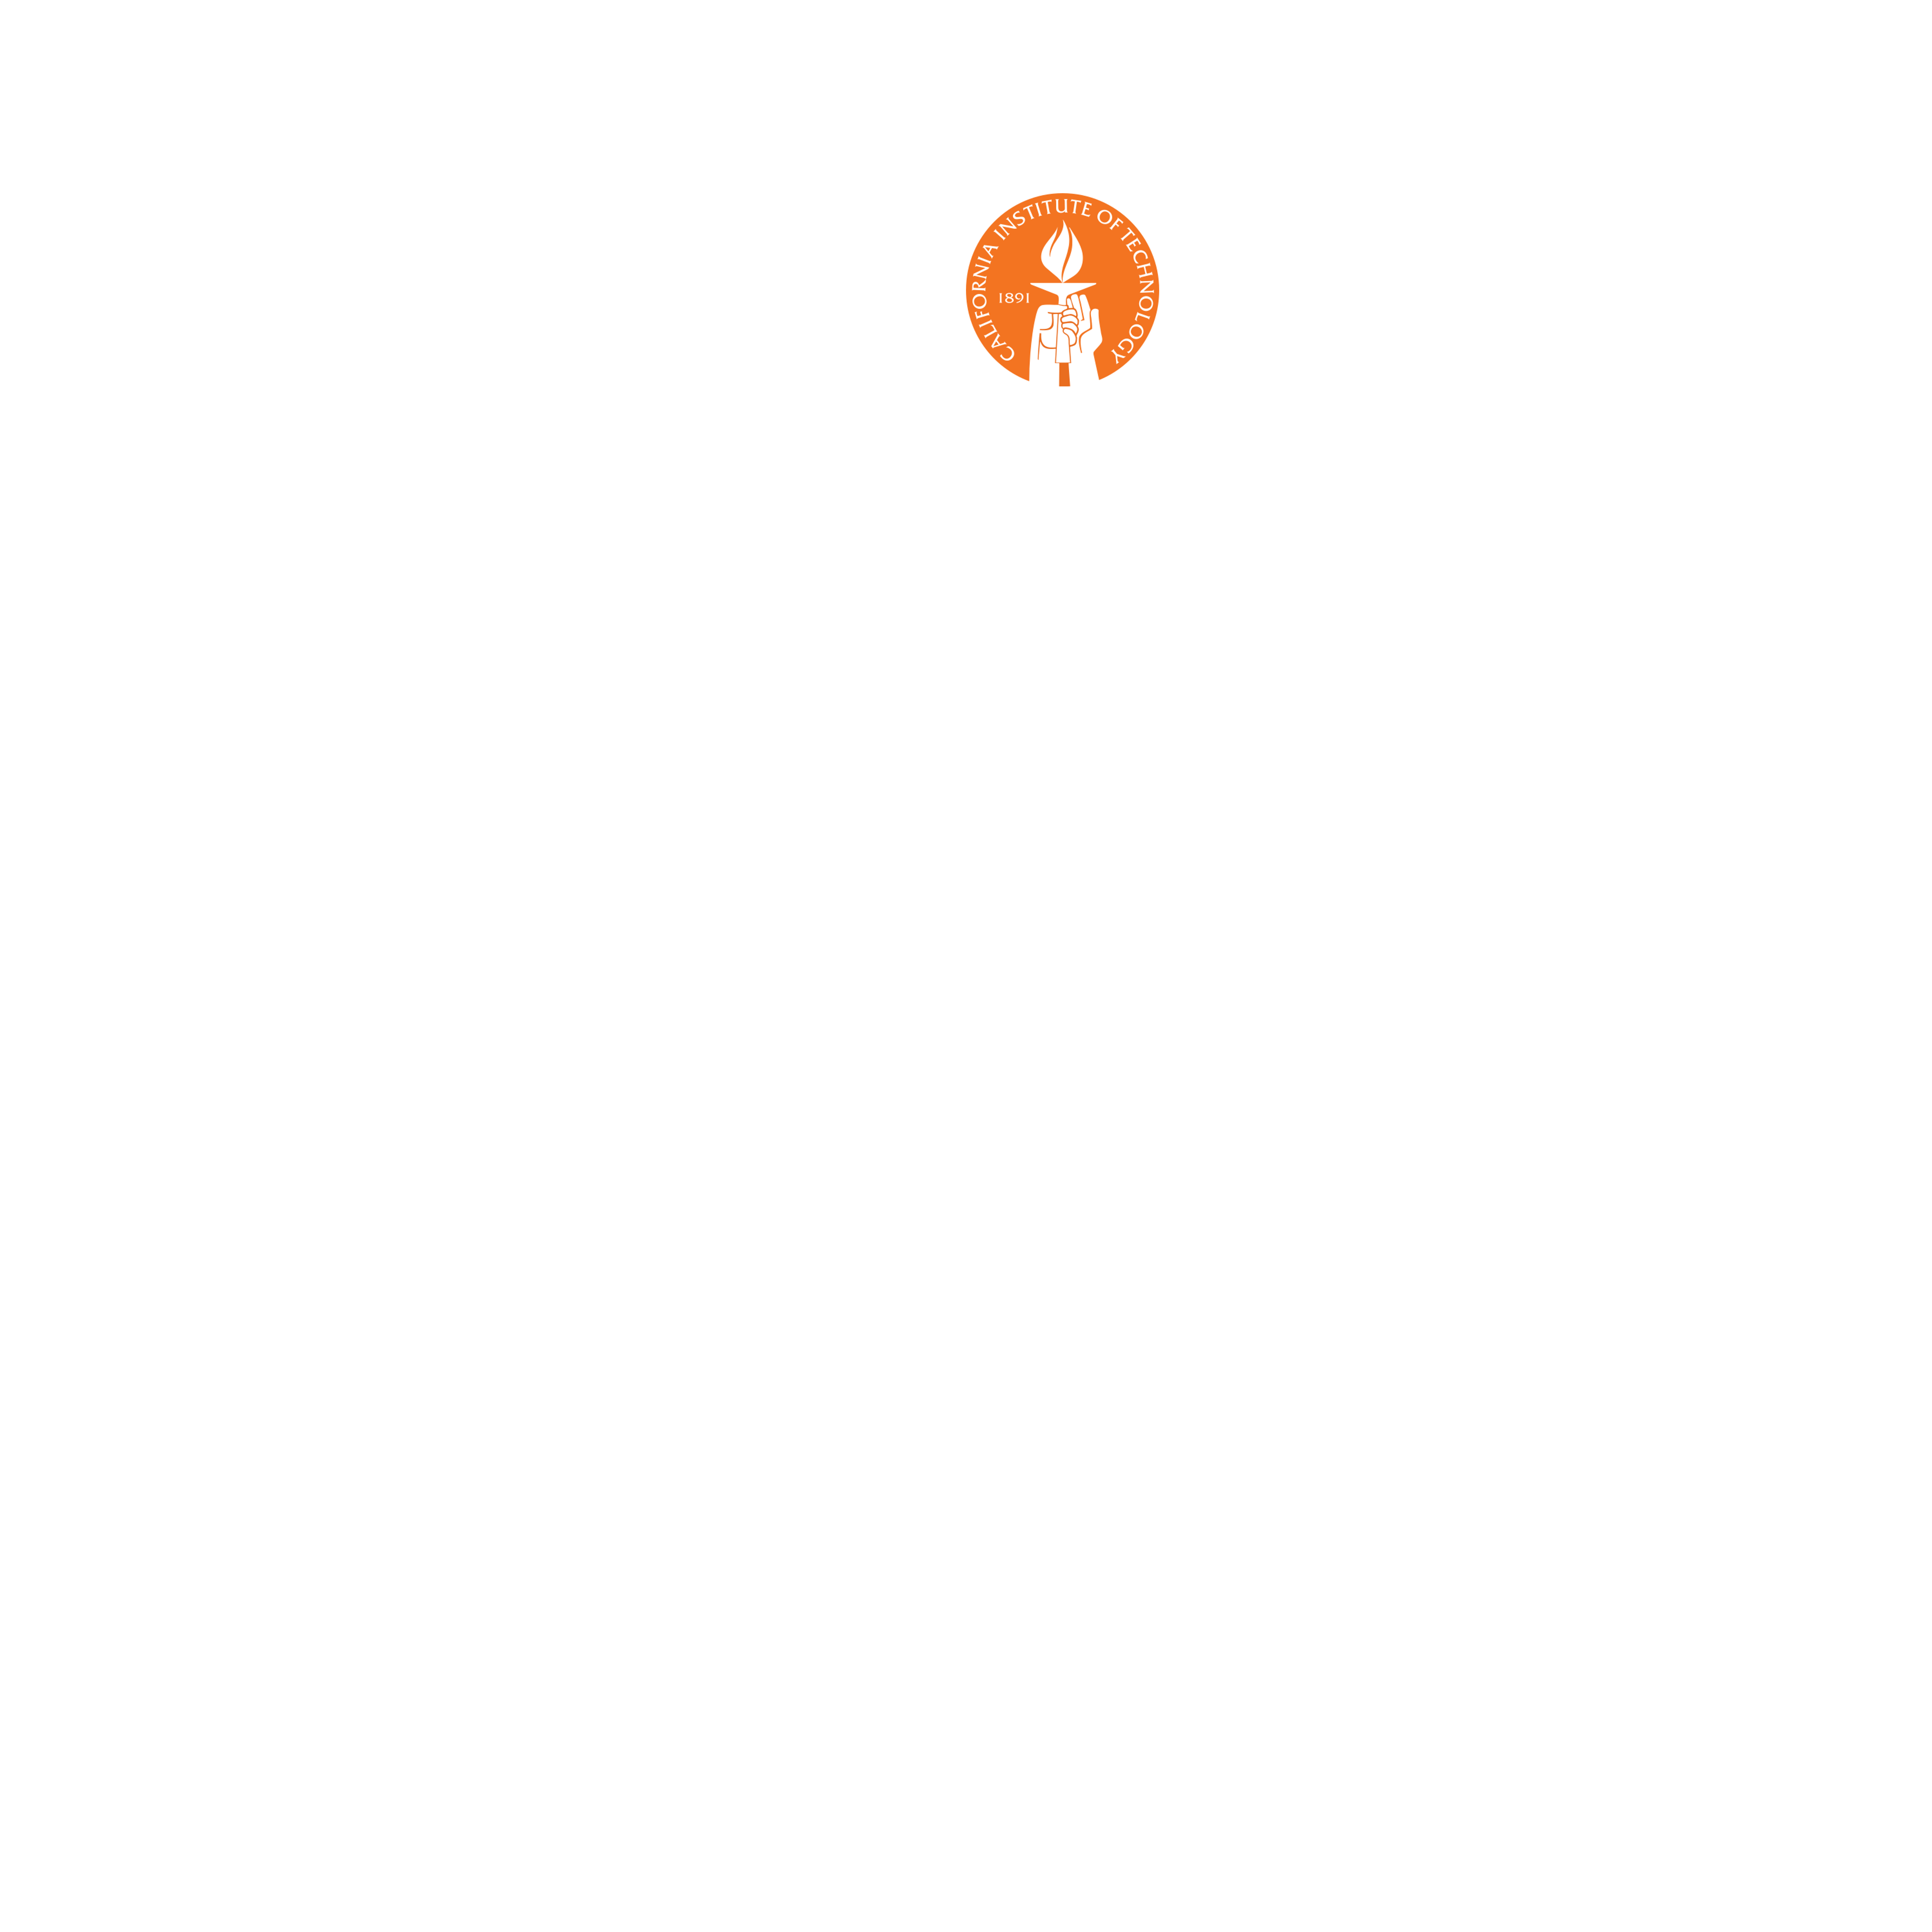

In [ ]:
def replace_transparent_with_white(image_path):
    # Open the image file
    img = Image.open(image_path)

    # Make sure the image has an alpha (transparency) channel
    if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):

        # Convert the image into RGBA if it is not already
        alpha = img.convert('RGBA')

        # Create a new image ('RGB') and paste the RGBA image into it
        # A white (255, 255, 255) background is created for this new image
        bg = Image.new('RGB', alpha.size, (255, 255, 255))
        bg.paste(alpha, mask=alpha.split()[3])  # 3 is the alpha channel in an RGBA image

        return bg

    else:
        return img


def paste_image_on_grid(image_size, grid_size, paste_image_path, row, col, img=None):
    # 计算每个子图的大小
    sub_size = (image_size[0]//grid_size, image_size[1]//grid_size)

    # 创建一张空白图片
    if img is None:
      img = Image.new('RGB', image_size, (255, 255, 255))

    # 打开你希望粘贴的图片并将其缩放到子图大小
    paste_img = replace_transparent_with_white(paste_image_path)
    paste_img = paste_img.resize(sub_size)

    # 在指定位置粘贴图片
    img.paste(paste_img, (col*sub_size[0], row*sub_size[1]))

    # 显示图片
    # img.show()

    return img

# 调用函数
image_size = (5000, 5000)
grid_size = 10
paste_image_path = '/content/drive/MyDrive/Uni logos/imgs/California Institute of Technology.png' # 请将这里替换为你的图片路径
row = 1
col = 5
paste_image_on_grid(image_size, grid_size, paste_image_path, row, col)


In [ ]:
t=1
for index, row in rank_df.iterrows():
  paste_image_path = '/content/drive/MyDrive/Uni logos/imgs/'+row['University']+'.png'
  if t==1:
    img = paste_image_on_grid(image_size, grid_size, paste_image_path, row['X'], row['Y'])
    t=0
  else:
    img = paste_image_on_grid(image_size, grid_size, paste_image_path, row['X'], row['Y'], img=img)


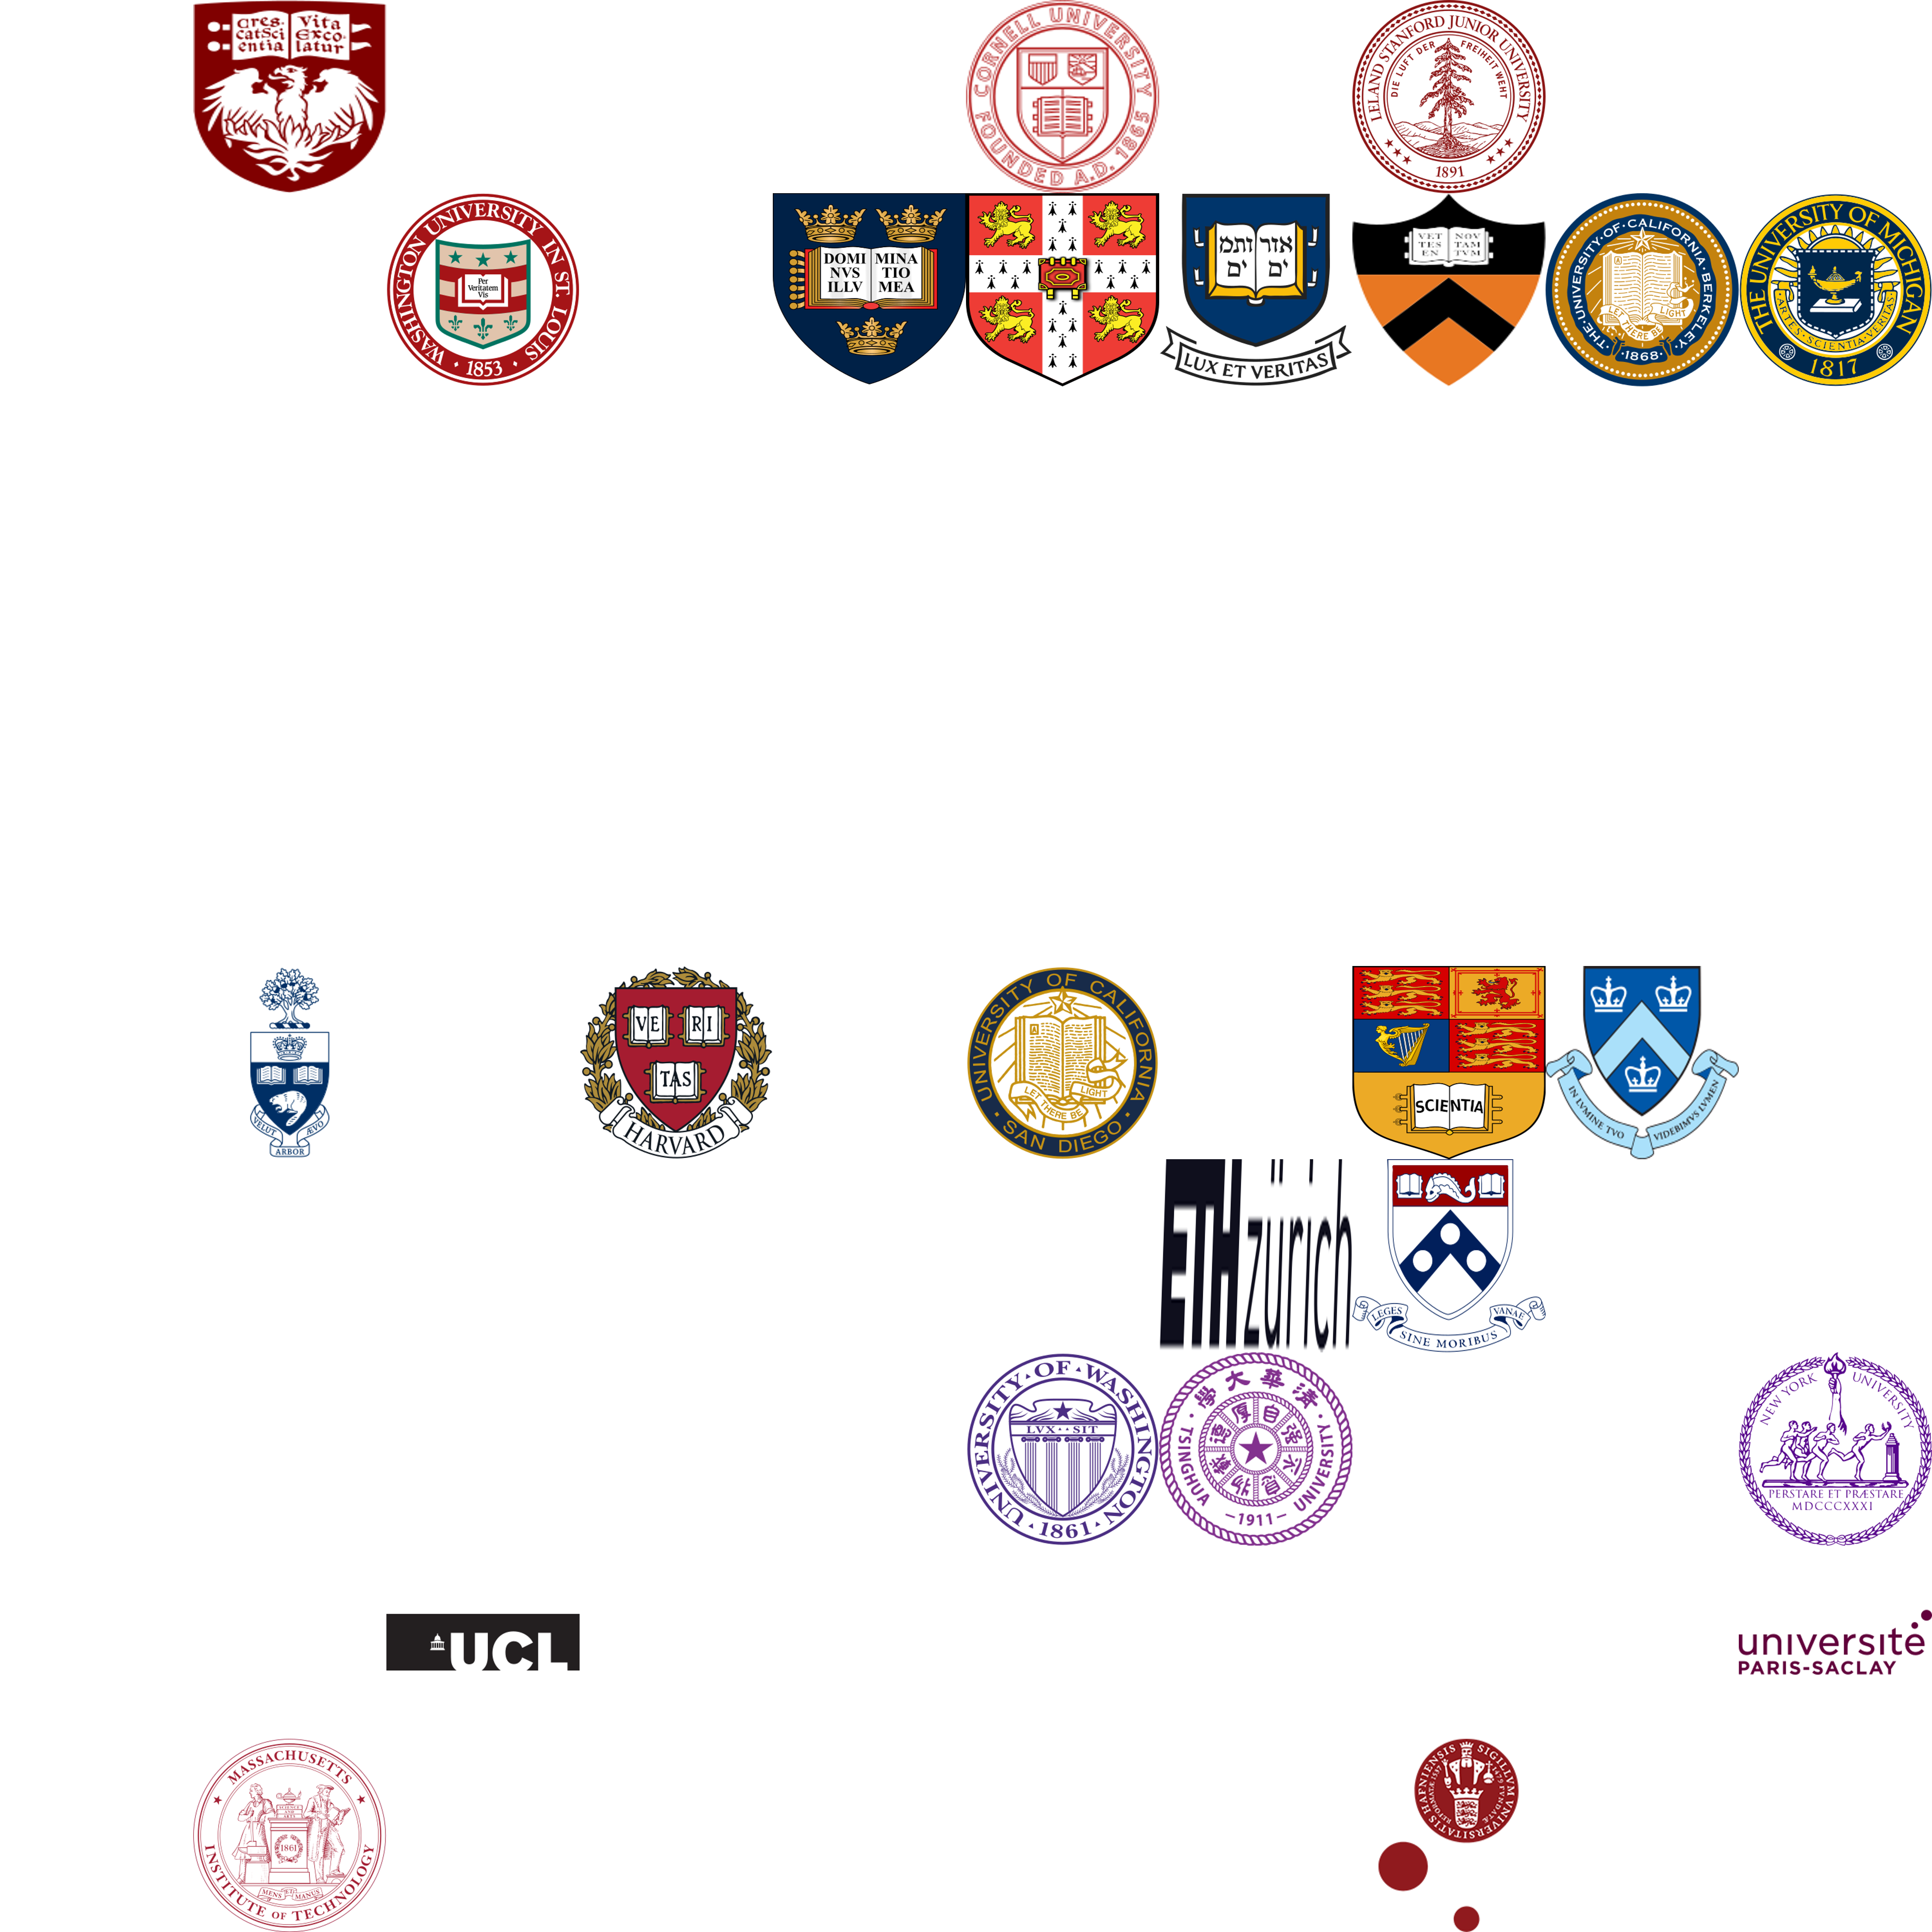

In [ ]:
img.show()

# Image?

In [ ]:
!pip install tqdm
!pip install openpyxl
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
from pathlib import Path
from urllib.parse import urljoin

import requests
import pandas as pd
from tqdm import tqdm
from bs4 import BeautifulSoup

In [ ]:
base_url = 'https://www.shanghairanking.com'
url = urljoin(base_url, 'rankings/arwu/2022')
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
soup

<!DOCTYPE html>

<html lang="en">
<script>!function(t){function c(){c.q.push(arguments)}t.TeaAnalyticsObject="collectEvent",t.collectEvent||(c.q=c.q||[],t.collectEvent=c),t.collectEvent.l=+new Date}(window)</script>
<script async="" src="https://sf1-scmcdn-tos.pstatp.com/goofy/log-sdk/collect/collect-autotrack-rangers.js"></script>
<script>window.collectEvent("init",{app_id:237653,channel:"cn",log:!0,autotrack:!1}),window.collectEvent("start")</script>
<head>
<title>ShanghaiRanking's Academic Ranking of World Universities</title><meta charset="utf-8" data-n-head="ssr"/><meta content="width=device-width,initial-scale=1" data-n-head="ssr" name="viewport"/><meta content="IE=edge" data-n-head="ssr" http-equiv="X-UA-Compatible"/><link data-n-head="ssr" href="/favicon.ico" rel="icon" type="image/x-icon"/><link as="script" href="/_nuxt/040b440.js" rel="preload"/><link as="script" href="/_nuxt/0c576a9.js" rel="preload"/><link as="script" href="/_nuxt/fad100f.js" rel="preload"/><link as="script

In [ ]:
img_page = soup.select('.univ-logo')
img_page

[<img alt="Harvard University" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/032bd1b77.png"/>,
 <img alt="Stanford University" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/13de8913b.png"/>,
 <img alt="Massachusetts Institute of Technology (MIT)" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/79165fd8b.png"/>,
 <img alt="University of Cambridge" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/8d9861b69.png"/>,
 <img alt="University of California, Berkeley" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/0ff179fb8.png"/>,
 <img alt="Princeton University" class="univ-logo" data-v-ae1ab4a8="" onerror='this.src="/images/default_logo.svg"' src="/_uni/logo/b1dad5288.png"/>,
 <img alt="University of Oxford" class="univ-logo" data-v-ae1ab

In [ ]:
folder_path = '/content/drive/MyDrive/Uni logos/images/'

In [ ]:
rank = []
for i in tqdm(range(100)):
  uni_name, short_path = img_page[i]['alt'], img_page[i]['src']
  rank.append(uni_name)

  rsp = requests.get(urljoin(base_url, short_path))

  with open(folder_path + f"{uni_name}{Path(short_path).suffix}", 'wb') as f:
    f.write(rsp.content)

 30%|███       | 30/100 [00:03<00:08,  8.49it/s]


IndexError: ignored

In [ ]:
rank_df = pd.DataFrame({'Rank': range(1, 1 + len(rank)), 'University': rank})
rank_df.to_excel(projectpath + 'uni ranking.xlsx', index=False)
rank_df